In [1]:
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

# sklearn
from sklearn import naive_bayes
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\somya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\somya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('combined_tweets.csv')

In [3]:
df

,Label,Tweet Id,Username,Text,clean_text
0,1,1245138728135385089,trippyhippie99,For someone who struggles with anxiety this pa...,someone struggles anxiety pandemic terrifying ...
1,1,1245116161223778306,KTABTV,Report: 31% of people sleeping less due to COV...,report people sleeping less due covid related ...
2,1,1245116161634820096,bigcountryhome,Report: 31% of people sleeping less due to COV...,report people sleeping less due covid related ...
3,1,1245116168224022532,futureof_school,Anxiety isn't an unusual feeling or reaction t...,anxiety unusual feeling reaction parents stude...
4,1,1245116301778927616,CaponeTeaches,"@hauber_alex For me, last week it was anxiety....",alex last week anxiety news first friend dying...
...,...,...,...,...,...
16153,0,1696043380,Irv25,Good Morning twitters!!! I am soooo tired...I ...,good morning twitters soooo tired really need ...
16154,0,2050960500,Smalltalkwitht,@JoyceSchneider1 It's so true... I did!,true
16155,0,1880015787,jaySics,i want to go see Terminator again. goodnight,want see terminator goodnight
16156,0,2016680792,Mzpurrfection,@popnbulletz1 SEE U 2 whats new,see whats new


In [4]:
print (df[df['clean_text'].isnull()])

       Label             Tweet Id        Username  \
1196       1  1267194163319246851         DrHyken   
1269       1  1267234357237837824      AlexTelman   
4218       1  1333544792941228032     alven334_al   
6576       1  1388177198494871552       MAC280215   
8329       0           1826246928   xxlilokittehh   
...      ...                  ...             ...   
15438      0           1558449271           MaLo8   
15749      0           2051417706      lilmo4ever   
15762      0           1553398707       Trish1981   
15958      0           1824584445     ReemerPromo   
15988      0           1957040606  tiffunnyfranco   

                                                    Text clean_text  
1196   How to #Prepare for #Life after #Quarantine. #...        NaN  
1269   My #wish for #you😀is \n#love &amp; #joy\n\n#he...        NaN  
4218   Awwww this is so freaking cute @The_WorldWeWan...        NaN  
6576             #Covid the #Great #Depression by #China        NaN  
8329         

In [5]:
df=df.dropna()
df = df.reset_index(drop=True)

In [6]:
print (df[df['clean_text'].isnull()])

Empty DataFrame
Columns: [Label, Tweet Id, Username, Text, clean_text]
Index: []


In [7]:
positives = df['Label'][df.Label == 0 ]
negatives = df['Label'][df.Label == 1 ]

print('Total length of the data is:         {}'.format(df.shape[0]))
print('No. of positive tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         16073
No. of positive tagged sentences is:  7795
No. of negative tagged sentences is: 8278


Text(0.5, 1.0, 'Distribution of Data')

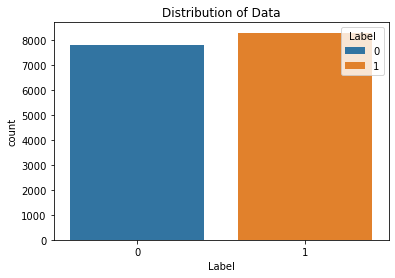

In [8]:
sns.countplot(x="Label", hue="Label", dodge=False, data=df).set_title("Distribution of Data")

In [9]:
from sklearn.utils import shuffle
df =  shuffle(df).reset_index(drop=True)

In [10]:
df

,Label,Tweet Id,Username,Text,clean_text
0,1,1377377457037185025,ItsDeeRenee12,@AdamantxYves I understand this feeling comple...,understand feeling completely anxiety around g...
1,1,1245113705085513728,VippusaO,MIXED MESSAGES COMING FROM WH IS CAUSING ANXIE...,mixed messages coming causing anxiety panic tr...
2,0,1564960153,alienzki,http://twitpic.com/3nhpr - Daxene got works to...,daxene got works paper works stuffs ahihi
3,0,2013933734,556KaraB,Packing for a Trip this weekend,packing trip weekend
4,1,1333511486879232000,___mMx,@_justkimberleyx I was alright at them first l...,alright first lockdown trying last weeks get b...
...,...,...,...,...,...
16068,0,2070808803,mimgodfather,@christine_downs Happy Birthday you,downs happy birthday
16069,0,1997067641,mariavenegas,#musicmonday Everyone follow @heymonday Love ...,everyone follow love music great band
16070,0,2189006788,christenxo,On bed rest =( had a scare last night the baby...,bed rest scare last night baby coming good thi...
16071,0,1933096608,JillHenninger,Starting to get ready for Seattle - can't wait...,starting get ready seattle wait see girls days...


In [11]:
X, y = df['clean_text'], df['Label']

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20, random_state = 19)
print(f'Data Split done.')

Data Split done.


In [14]:
## Naive Bayes
def nb_classifier(X_train, X_test, y_train, y_test):

    nb =  Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB()),
                 ])

    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred))

In [15]:
nb_classifier(X_train, X_test, y_train, y_test)

accuracy 0.9262830482115085
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1510
           1       0.88      0.99      0.93      1705

    accuracy                           0.93      3215
   macro avg       0.94      0.92      0.93      3215
weighted avg       0.93      0.93      0.93      3215



In [16]:
pip install vaderSentiment

In [17]:
# Install textblob library
!pip install textblob

# Import TextBlob module
from textblob import TextBlob

In [18]:
# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\somya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
def format_VADER_output(output_dict):
  
  polarity = 0

  if(output_dict['compound']>= 0.05):
    polarity = 0 #positive polarity

  elif(output_dict['compound']<= -0.05):
    polarity = 1 #negative polarity

  return polarity

def predict_VADER_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_VADER_output(output_dict)

In [20]:
def format_TextBlob_output(prediction):
  
  polarity = 0

  if(prediction.polarity > 0):
    polarity = 0 #positive polarity

  elif(prediction.polarity < 0):
    polarity = 1 #negative polarity

  return polarity

def predict_Textblob_sentiment(text):
  
  text_blob_prediction =  TextBlob(text).sentiment
  return format_TextBlob_output(text_blob_prediction)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

## VADER SECTION
df["vader_prediction"] = df["clean_text"].apply(predict_VADER_sentiment)
vader_accuracy = accuracy_score(df['Label'], df['vader_prediction'])

## TextBlob SECTION
df["textblob_prediction"] = df["clean_text"].apply(predict_Textblob_sentiment)
textblob_accuracy = accuracy_score(df['Label'], df['textblob_prediction'])

## Print the results
print("Accuracy Scores")
print("- VADER: {}".format(vader_accuracy))
print("- Textblob: {}".format(textblob_accuracy))


print("Classification report")
print("- VADER")
print(classification_report(df['Label'], df['vader_prediction']))
print("\n")

print("- TextBlob")
print(classification_report(df['Label'], df['textblob_prediction']))

Accuracy Scores
- VADER: 0.8045168916817023
- Textblob: 0.599079201144777
Classification report
- VADER
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      7795
           1       0.88      0.72      0.79      8278

    accuracy                           0.80     16073
   macro avg       0.82      0.81      0.80     16073
weighted avg       0.82      0.80      0.80     16073



- TextBlob
              precision    recall  f1-score   support

           0       0.55      0.90      0.68      7795
           1       0.77      0.32      0.45      8278

    accuracy                           0.60     16073
   macro avg       0.66      0.61      0.57     16073
weighted avg       0.66      0.60      0.56     16073



In [22]:
vectoriser = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer())])
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')

Vectoriser fitted.


In [23]:
file = open('vectoriser.pickle','wb')
pickle.dump(vectoriser, file)
file.close()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 19)
model =  Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB()),
                 ])
mnb = model.fit(X_train, y_train)
pickle.dump(mnb,open("mnb.bin",'wb'))
y_pred = model.predict(X_test)

In [25]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [26]:
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [27]:
import regex as re
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
     def replace(match):
        return contractions_dict[match.group(0)]
     return contractions_re.sub(replace, s)

In [28]:
!pip install ftfy
import ftfy

In [29]:
stop_words = set(stopwords.words("english"))

In [30]:
stop_words.update(("mon","tue","wed","thu","fri","sat","sun","sunday","monday","tuesday","thursday","friday","saturday","sunday","thurs","thur","tues"))
stop_words.update(("january","february","march","april","may","june","july","august",
              "september","october","november","december","jan","feb","mar","apr",
              "may","jun","jul","aug","sep","oct","nov","dec", "twitter", "thanking","thanks","fuck","fucking", "might","like"))

In [31]:
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
            tweet = str(tweet)
        # if url links, then don't append to avoid news articles, etc.
        # Check tweet length, save those > 6 (length of word "lonely")
            tweet = tweet.lower()

       
            tweet = re.sub(r"http\S+", "", tweet)
            tweet = re.sub(r'www.+', "", tweet)
            tweet = re.sub('[0-9]+', '', tweet)

            #remove hashtags, @mention, emoji and image URLs
            tweet = ' '.join(re.sub("(@[a-z0-9]+)|(\#[a-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())
            # Remove HTML special entities (e.g. &amp;)
            tweet = re.sub(r'\&\w*;', '', tweet)
            #Convert @username to AT_USER
            tweet = re.sub('@[^\s]+','',tweet)
            # Remove tickers
            tweet = re.sub(r'\$\w*', '', tweet)
            # Remove hyperlinks
            tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
            # Remove words with 2 or fewer letters
            tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
            # Remove whitespace (including new line characters)
            tweet = re.sub(r'\s\s+', ' ', tweet)
            # Remove single space remaining at the front of the tweet.
            tweet = tweet.lstrip(' ') 
            # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
            tweet = ''.join(c for c in tweet if c <= '\uFFFF')
            #fix weirdly encoded texts
            tweet = ftfy.fix_text(tweet)
            #expand contraction
            tweet = expand_contractions(tweet)
            #remove punctuation
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())
            
            
            # Tokenize and join to remove unneccessary white spaces
            words = [x for x  in tok.tokenize(tweet) if len(x) > 1]
            #return (" ".join(words)).strip()

                    
    
            word_tokens = nltk.word_tokenize(tweet) 
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            tweet = ' '.join(filtered_sentence)

            #stemming words
            tweet = PorterStemmer().stem(tweet)
            
            cleaned_tweets.append(tweet)

    return cleaned_tweets

In [32]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the model.
    file = open("C:/Users/somya/Downloads/mnb.bin", 'rb')
    mnb = pickle.load(file)
    file.close()
   
    
    return mnb

In [33]:
def predict(model, text):
    # Predict the sentiment
    textdata = clean_tweets(text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Positive","Negative"])
    return df

if __name__=="__main__":
    # Loading the models.
    mnb = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "@BullofJohn @Shawnifee Am a mech engr n lost my job during this pandemic and since then feeding v been a very big issue for me. Pls am nt begging for food though I won't still reject if given but my major need now is a job even if it's a casual job or driving.pls help me out. Am dying of depression.",
            "@MetalMikey Hehe, true that! It was just a really cool ride, funny and exciting all the way through. Even the stuff I feared was cool.",
            "I love my life",
            "I feel like this sounds bad, but my depression is getting to the point where I'd rather get COVID than have to deal with my mental health"]
    
    df = predict(mnb, text)
    print(df.head())

                                                text sentiment
0                                     I hate twitter  Negative
1  @BullofJohn @Shawnifee Am a mech engr n lost m...  Negative
2  @MetalMikey Hehe, true that! It was just a rea...  Positive
3                                     I love my life  Positive
4  I feel like this sounds bad, but my depression...  Negative
